In [1]:
import pandas as pd
import pymc as pm
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data = pd.read_csv('https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv')

Initializing NUTS using jitter+adapt_diag...
c:\Users\chris\anaconda3\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gate_30_1_day_prior, gate_40_1_day_prior]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 29 seconds.


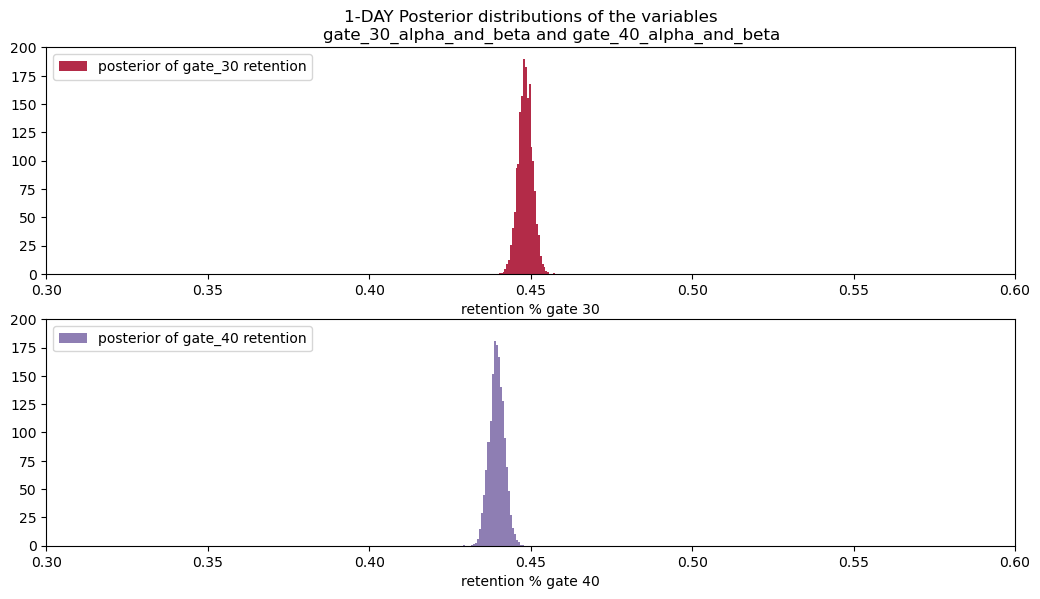

Initializing NUTS using jitter+adapt_diag...
c:\Users\chris\anaconda3\Lib\site-packages\pytensor\tensor\rewriting\elemwise.py:1024: UserWarning: Loop fusion failed because the resulting node would exceed the kernel argument limit.
  warn(
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [gate_30_7_day_prior, gate_40_7_day_prior]


Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 30 seconds.


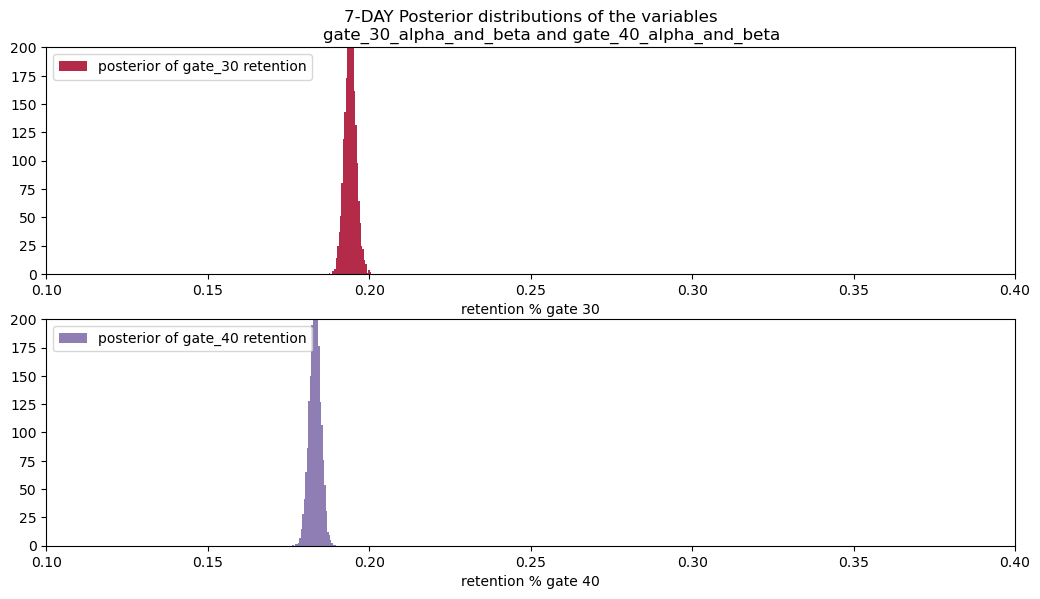

In [20]:
# helper function to take in intuitive information about expectations and turn it into alpha/beta prior
# scales the value based on the # of records in the dataset
def get_priors(anticipated_retention_rate, no_of_records, prior_name, certainty=""):
    custom_weighting_percentage = 0.01
    alpha = anticipated_retention_rate
    beta = 1 - alpha
    prior_scaler = 1
    if certainty.lower() == 'strong':
        prior_scaler = 0.12 * no_of_records
    elif certainty.lower() == 'medium':
        prior_scaler = 0.07 * no_of_records
    elif certainty.lower() == 'weak':
        prior_scaler = 0.01 * no_of_records
    else:
        prior_scaler = custom_weighting_percentage * no_of_records
    
    alpha = alpha * prior_scaler
    beta = beta * prior_scaler

    return pm.Beta(prior_name, alpha=alpha, beta=beta)

def model_and_plot_1_day():
    # 1 day model
    with pm.Model() as model:
        # filter data by version
        gate_30 = data[data['version'] == 'gate_30']
        gate_40 = data[data['version'] == 'gate_40']

        # set priors
        gate_30_priors = get_priors(
            anticipated_retention_rate=.45,
            certainty='MEDIUM',
            no_of_records=len(gate_30),
            prior_name="gate_30_1_day_prior")
        
        gate_40_priors = get_priors(
            anticipated_retention_rate=.40,
            certainty='MEDIUM',
            no_of_records=len(gate_40),
            prior_name="gate_40_1_day_prior")

        # observations
        gate_30_day_1_retention_count = gate_30['retention_1'].sum()
        gate_40_day_1_retention_count = gate_40['retention_1'].sum()

        gate_30_observations = pm.Binomial(
            'gate_30_1_day_observations',
            n=len(gate_30),
            p=gate_30_priors,
            observed=gate_30_day_1_retention_count)
        
        gate_40_observations = pm.Binomial(
            'gate_40_1_day_observations',
            n=len(gate_40),
            p=gate_40_priors,
            observed=gate_40_day_1_retention_count)

        trace = pm.sample(1000, tune=500, return_inferencedata=False)



    # lecture notes follow link and search for "plot the outcomes"
    # https://github.com/dustywhite7/Econ8310/blob/master/SlidesCode/10%20-%20Baysian%20Statistics%20I.md
    figsize(12.5, 10)
    #histogram of the samples:
    X_MIN, X_MAX = 0.3, 0.6
    Y_MIN, Y_MAX = 0, 200

    # trace object contains our sample outcomes
    gate_30_samples = trace['gate_30_1_day_prior']
    gate_40_samples = trace['gate_40_1_day_prior']

    # gate_30_priors
    ax = plt.subplot(311)
    ax.set_autoscaley_on(False)

    plt.hist(gate_30_samples, histtype='stepfilled', bins=30, alpha=0.85,
            label="posterior of gate_30 retention", color="#A60628", density=True)
    plt.legend(loc="upper left")
    plt.title(r"""1-DAY Posterior distributions of the variables
        gate_30_alpha_and_beta and gate_40_alpha_and_beta""")
    plt.ylim([Y_MIN, Y_MAX])
    plt.xlim([X_MIN, X_MAX])
    plt.xlabel("retention % gate 30")


    # gate_40_priors
    ax = plt.subplot(312)
    ax.set_autoscaley_on(False)
    plt.hist(gate_40_samples, histtype='stepfilled', bins=30, alpha=0.85,
            label="posterior of gate_40 retention", color="#7A68A6", density=True)
    plt.legend(loc="upper left")
    plt.ylim([Y_MIN, Y_MAX])
    plt.xlim([X_MIN, X_MAX])
    plt.xlabel("retention % gate 40")

    plt.show()

def model_and_plot_7_day():
    # 7 day model
    with pm.Model() as model2:
        # filter data by version
        gate_30 = data[data['version'] == 'gate_30']
        gate_40 = data[data['version'] == 'gate_40']

        # set priors
        gate_30_priors = get_priors(
            anticipated_retention_rate=.25,
            certainty='MEDIUM',
            no_of_records=len(gate_30),
            prior_name="gate_30_7_day_prior")
        
        gate_40_priors = get_priors(
            anticipated_retention_rate=.20,
            certainty='MEDIUM',
            no_of_records=len(gate_40),
            prior_name="gate_40_7_day_prior")

        # observations
        gate_30_day_7_retention_count = gate_30['retention_7'].sum()
        gate_40_day_7_retention_count = gate_40['retention_7'].sum()

        gate_30_observations = pm.Binomial(
            'gate_30_7_day_observations',
            n=len(gate_30),
            p=gate_30_priors,
            observed=gate_30_day_7_retention_count)
        
        gate_40_observations = pm.Binomial(
            'gate_40_7_day_observations',
            n=len(gate_40),
            p=gate_40_priors,
            observed=gate_40_day_7_retention_count)

        trace = pm.sample(1000, tune=500, return_inferencedata=False)


    # lecture notes follow link and search for "plot the outcomes"
    # https://github.com/dustywhite7/Econ8310/blob/master/SlidesCode/10%20-%20Baysian%20Statistics%20I.md
    figsize(12.5, 10)
    #histogram of the samples:
    X_MIN, X_MAX = 0.1, 0.4
    Y_MIN, Y_MAX = 0, 200

    # trace object contains our sample outcomes
    gate_30_samples = trace['gate_30_7_day_prior']
    gate_40_samples = trace['gate_40_7_day_prior']

    # gate_30_priors
    ax = plt.subplot(311)
    ax.set_autoscaley_on(False)

    plt.hist(gate_30_samples, histtype='stepfilled', bins=30, alpha=0.85,
            label="posterior of gate_30 retention", color="#A60628", density=True)
    plt.legend(loc="upper left")
    plt.title(r"""7-DAY Posterior distributions of the variables
        gate_30_alpha_and_beta and gate_40_alpha_and_beta""")
    plt.ylim([Y_MIN, Y_MAX])
    plt.xlim([X_MIN, X_MAX])
    plt.xlabel("retention % gate 30")


    # gate_40_priors
    ax = plt.subplot(312)
    ax.set_autoscaley_on(False)
    plt.hist(gate_40_samples, histtype='stepfilled', bins=30, alpha=0.85,
            label="posterior of gate_40 retention", color="#7A68A6", density=True)
    plt.legend(loc="upper left")
    plt.ylim([Y_MIN, Y_MAX])
    plt.xlim([X_MIN, X_MAX])
    plt.xlabel("retention % gate 40")

    plt.show()

model_and_plot_1_day()
model_and_plot_7_day()
